In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh as bk

In [7]:
df = pd.read_csv('./data/ObesityDataSet_raw_and_data_sinthetic.csv')
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


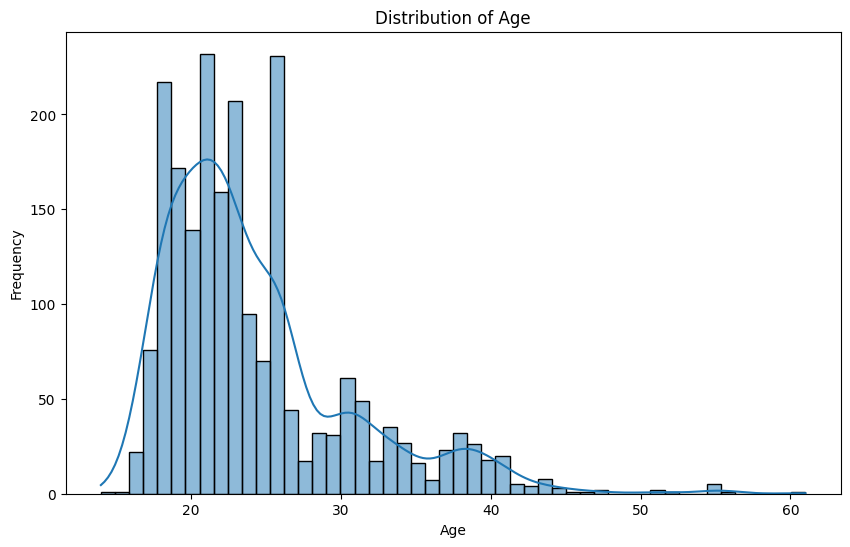

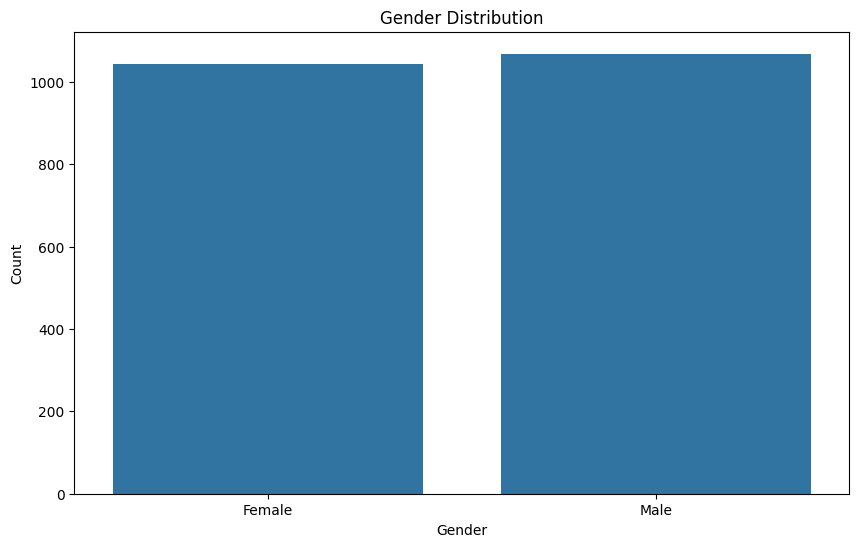

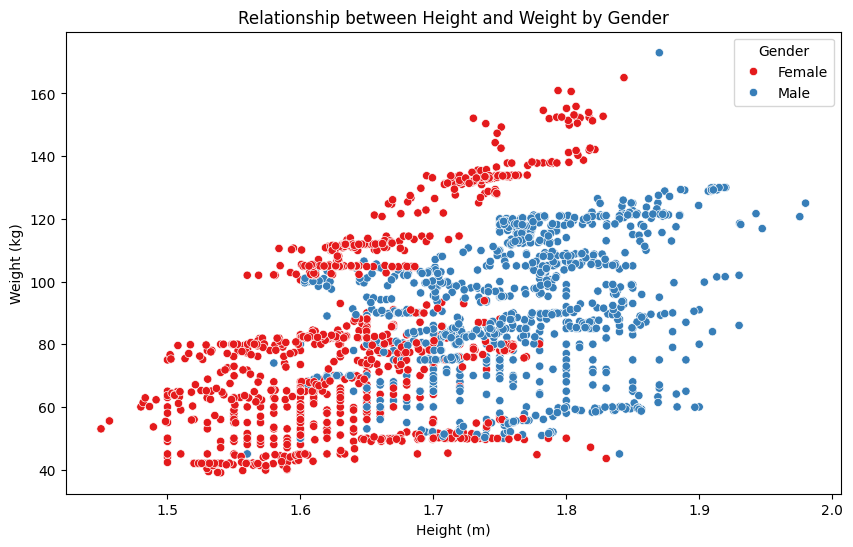

In [8]:
# Distribution of Age (all)
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distrbiution of Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Relations between Height and Weight (by Gender)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df, palette='Set1')
plt.title('Relationship between Height and Weight by Gender')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

In [10]:
# Smoking in Focus

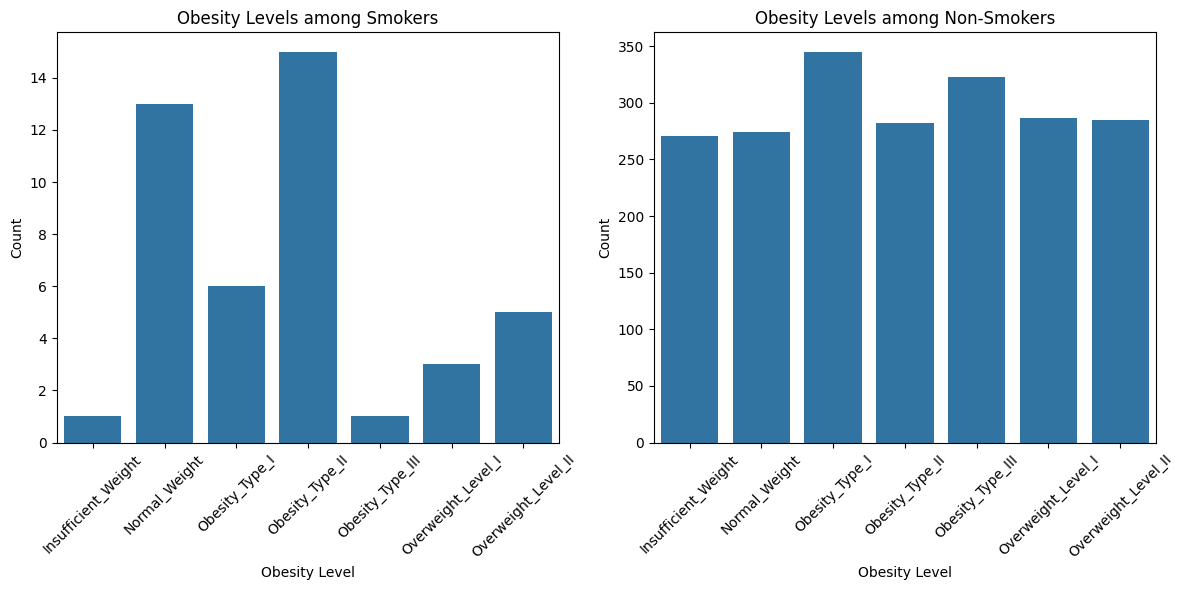

In [11]:
smokers = df[df['SMOKE'] == 'yes']
non_smokers = df[df['SMOKE'] == 'no']

# Plotting Config
plt.figure(figsize=(12, 6))

# Subplot for smokers
plt.subplot(1, 2, 1)
sns.countplot(x='NObeyesdad', data=smokers, order=sorted(smokers['NObeyesdad'].unique()))
plt.title('Obesity Levels among Smokers')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Subplot for not smokers
plt.subplot(1, 2, 2)
sns.countplot(x='NObeyesdad', data=non_smokers, order=sorted(non_smokers['NObeyesdad'].unique()))
plt.title('Obesity Levels among Non-Smokers')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

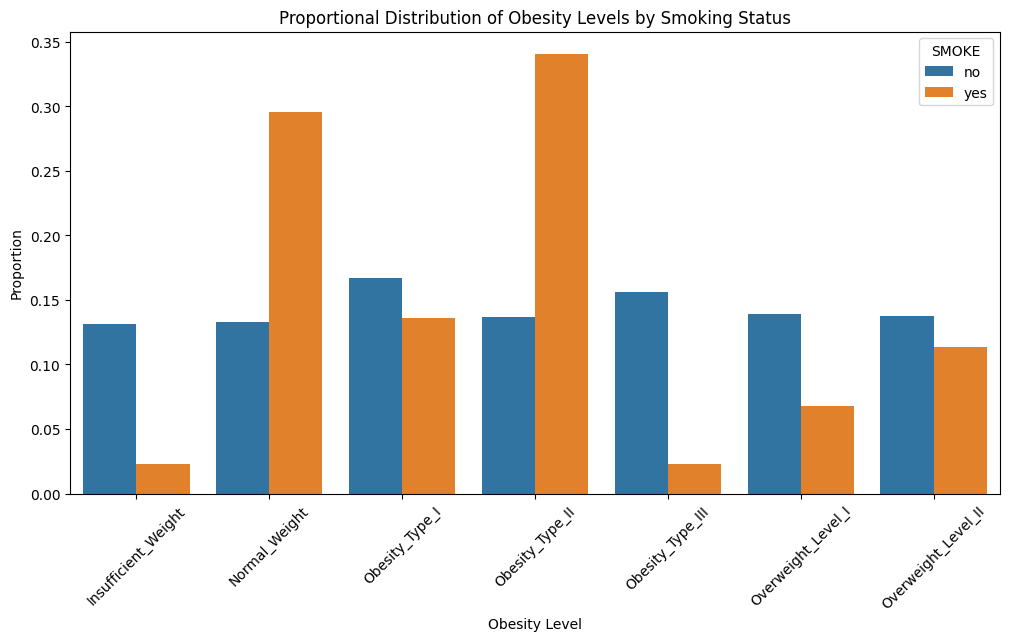

In [12]:
# Normalized Bar Chart
grouped = df.groupby(['SMOKE', 'NObeyesdad']).size().reset_index(name='count')
grouped['total'] = grouped.groupby('SMOKE')['count'].transform('sum')
grouped['percentage'] = grouped['count'] / grouped['total']

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='NObeyesdad', y='percentage', hue='SMOKE', data=grouped)
plt.title('Proportional Distribution of Obesity Levels by Smoking Status')
plt.xlabel('Obesity Level')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.show()

In [14]:
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(df['SMOKE'], df['NObeyesdad'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)

Chi-square statistic: 32.13783205600177
p-value: 1.5354243135096318e-05


1. Chi-square: 32,14 deutet auf einen starken Zusammenhang zwischen dem Raucherstatus und dem Grad der Fettleibigkeit hin.
2. p-Wert ist sehr gering (signifikant kleiner als 0,05), was bedeutet, dass die beobachteten Unterschiede im Grad der Fettleibigkeit zwischen Rauchern und Nichtrauchern wahrscheinlich nicht auf Zufall beruhen

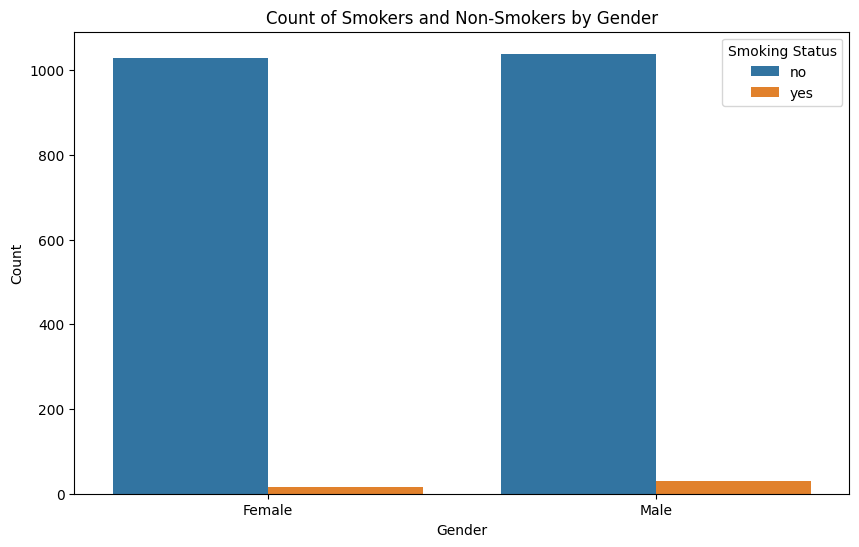

In [15]:
# Plotting Smokers and Non Somkers by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='SMOKE', data=df)
plt.title('Count of Smokers and Non-Smokers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()